# load trajectories and bin the locations

In [1]:
%matplotlib inline
from tramway.helper import *
from tramway.feature.single_traj import extract_features

trajectory_file = 'trajectories.txt'
trajectories = load_xyt(trajectory_file)
analyses = Analyses(trajectories)
tessellate(analyses, 'hexagon', label='hexagon')
trajectories

,n,x,y,t
0,1,-0.478794,-0.337067,0.50
1,1,-0.474625,-0.185356,0.55
2,1,-0.250008,-0.239683,0.60
3,1,-0.144937,-0.307840,0.65
4,2,0.488249,-0.363448,1.15
5,2,0.601460,-0.459262,1.20
6,2,0.639672,-0.382196,1.25
7,3,-0.462466,-0.198058,1.75
8,4,0.298999,0.119133,2.25
9,4,0.451615,0.157069,2.30


# specify how to average the trajectory features per bin

In [2]:
import pandas as pd

def get_feature_summary(func=pd.DataFrame.mean):
    # name `summary` is borrowed from R's summary function
    def mean(cells):
        index = []
        mean_features = []
        for i in cells:
            trajectory_indices = cells[i].n
            mean_features_i = func(cells.trajectory_features.loc[trajectory_indices], skipna=True)
            index.append(i)
            mean_features.append(mean_features_i.values)
        return pd.DataFrame(np.stack(mean_features), index=index, columns=cells.trajectory_features.columns)
    return mean

In [3]:
helper = Infer()
helper.labels(input_label='hexagon', output_label='trajectory features')
helper.prepare_data(analyses)
helper.plugin('feature summary', func=get_feature_summary(pd.DataFrame.median))
class Cells(Distributed):
    # allow dynamic allocation of the `trajectory_features` attribute
    pass
cells = helper.distribute(new_group=Cells)

# get the trajectory features

In [4]:
cells.trajectory_features = extract_features(trajectories, None, pbar=False)
cells.trajectory_features

,angle_autocorr1,angle_autocorr2,angle_var,area,asphericity,asymmetry,autocorr_1,autocorr_2,autocorr_3,drift_norm,...,size,step_kurtosis,step_max,step_mean,step_min,step_skewness,step_var,straightness,t_max,t_min
n,,,,,,,,,,,,,,,,,,,,,
1,-1.000000,NaN,0.520203,0.030064,0.527699,0.306321,-0.942008,0.384015,NaN,2.076222,...,4.0,-1.500000,0.231093,0.169367,0.125241,0.527098,0.002022,0.659580,0.15,0.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-0.018595,-0.344950,0.595723,0.058090,0.059950,0.030433,-0.473232,-0.449257,0.704455,1.087552,...,10.0,-1.351810,0.211370,0.123766,0.032503,-0.000814,0.004052,0.146561,0.45,0.0
5,-0.006164,-0.715772,0.325213,0.093597,0.095472,0.048913,-0.742922,0.170545,0.356374,1.844992,...,9.0,-0.704484,0.242871,0.125012,0.038465,0.457845,0.003991,0.444382,0.40,0.0
6,-0.039444,-0.791433,1.030975,0.016418,0.691832,0.424520,-0.878895,0.619486,-0.529067,1.245993,...,6.0,-0.842428,0.280767,0.136833,0.035298,0.622310,0.007090,0.168398,0.25,0.0
7,-0.392085,-0.505699,0.662294,0.033006,0.325290,0.177507,-0.117544,-0.074674,-0.911419,1.239169,...,7.0,-1.761838,0.191804,0.110589,0.048626,0.225242,0.004026,0.323250,0.30,0.0
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# average the trajectory features per bin

In [5]:
summary = helper.infer(cells)
summary = summary.maps
summary

,angle_autocorr1,angle_autocorr2,angle_var,area,asphericity,asymmetry,autocorr_1,autocorr_2,autocorr_3,drift_norm,...,size,step_kurtosis,step_max,step_mean,step_min,step_skewness,step_var,straightness,t_max,t_min
6,-0.056070,-0.460425,0.510244,0.114215,0.658709,0.399515,-0.273598,-0.222125,0.099127,1.226056,...,11.0,-0.820952,0.228083,0.130088,0.057882,0.159550,0.003085,0.557671,0.50,0.0
7,-0.153410,0.091658,0.524876,0.106737,0.289764,0.156516,0.074784,-0.305961,0.042807,1.361268,...,11.0,-0.767473,0.232960,0.143972,0.045290,0.357673,0.003472,0.336886,0.50,0.0
8,-0.237197,-0.010863,0.670773,0.163789,0.692142,0.424756,0.555456,-0.194636,-0.337311,2.249161,...,11.0,-1.094548,0.232225,0.139961,0.026258,-0.371712,0.004287,0.449816,0.50,0.0
10,-0.162268,-0.345055,0.747028,0.061764,0.547320,0.319737,-0.244946,-0.188741,-0.140586,1.076444,...,8.0,-0.957260,0.215750,0.131961,0.051803,0.204770,0.003581,0.362527,0.35,0.0
11,-0.148814,-0.071889,0.666226,0.057428,0.401511,0.224088,-0.150604,-0.074714,-0.090647,0.895540,...,10.0,-0.917027,0.228083,0.129331,0.037403,0.396727,0.003453,0.286578,0.45,0.0
12,-0.153410,-0.150490,0.670773,0.083284,0.378778,0.209967,-0.113176,-0.166232,-0.129531,0.884930,...,11.0,-0.822239,0.229701,0.128176,0.039095,0.342669,0.003557,0.292475,0.50,0.0
13,-0.036177,-0.114317,0.666226,0.256295,0.818588,0.526437,-0.113176,0.359617,0.061127,0.842444,...,24.0,-0.807034,0.249446,0.128176,0.025864,0.323428,0.003818,0.363294,1.15,0.0
14,-0.054453,-0.551473,0.813461,0.228870,0.008297,0.004157,0.085039,-0.240651,-0.183931,1.323086,...,22.0,-0.571838,0.289006,0.132543,0.036356,0.826271,0.006091,0.202937,1.05,0.0
15,-0.109310,-0.261463,0.653299,0.053433,0.453004,0.256832,-0.140766,-0.117596,-0.107085,1.051058,...,9.0,-0.979086,0.242285,0.132292,0.040542,0.343086,0.003643,0.318433,0.40,0.0
16,-0.135868,-0.269402,0.707009,0.072381,0.400802,0.223645,-0.106356,-0.041656,-0.273599,0.962279,...,10.0,-0.726329,0.235406,0.123766,0.032674,0.311393,0.003793,0.291947,0.45,0.0


# plot the average features

/usr/lib/python3/dist-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


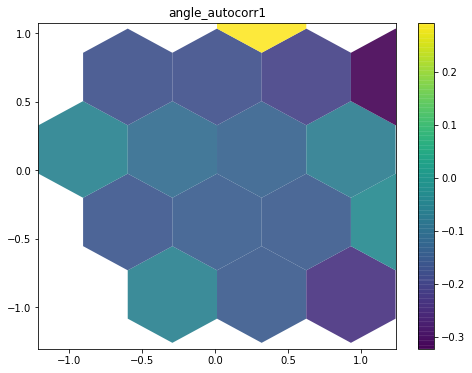

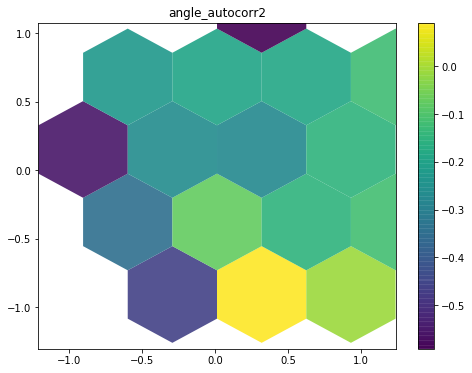

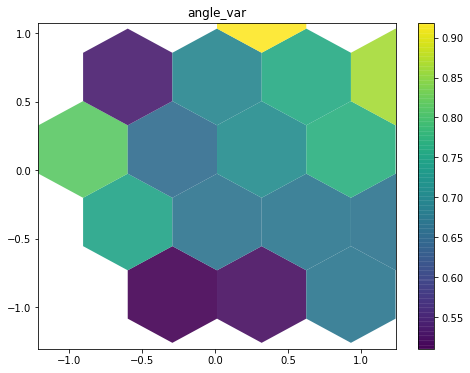

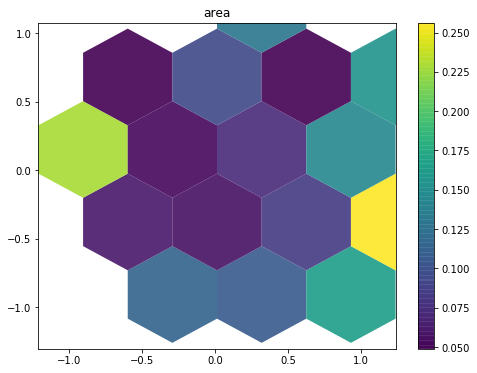

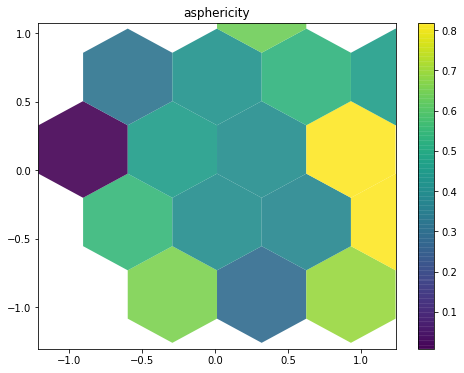

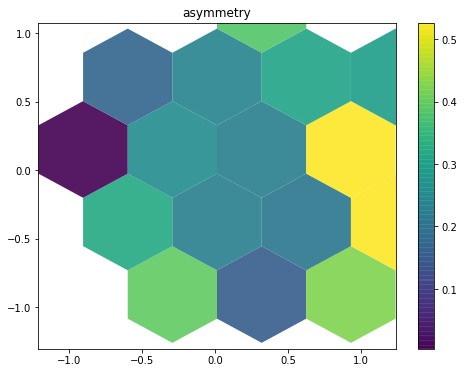

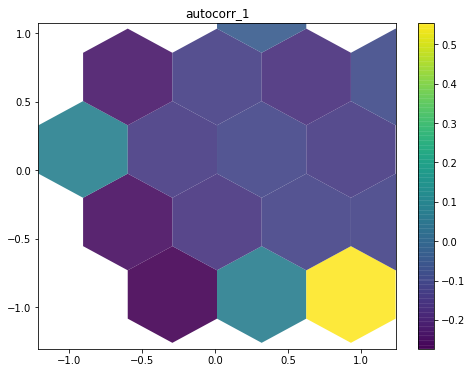

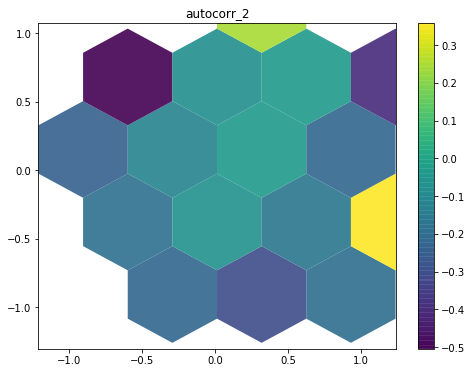

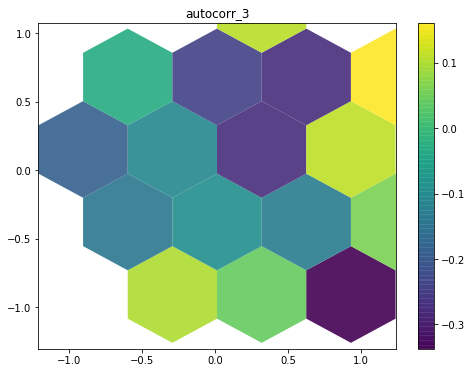

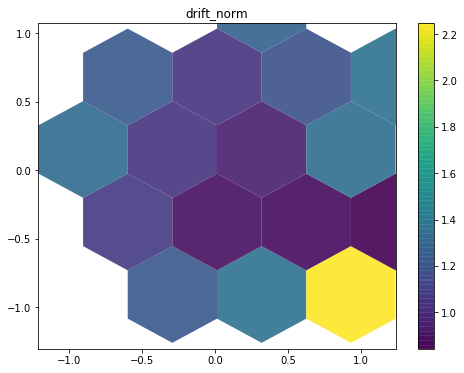

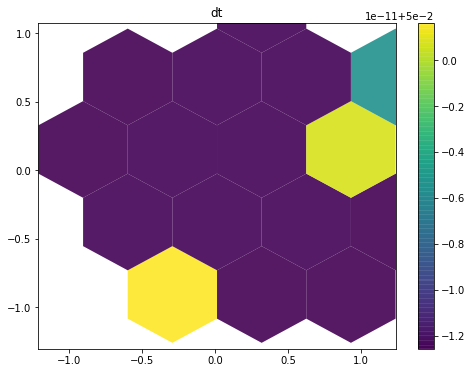

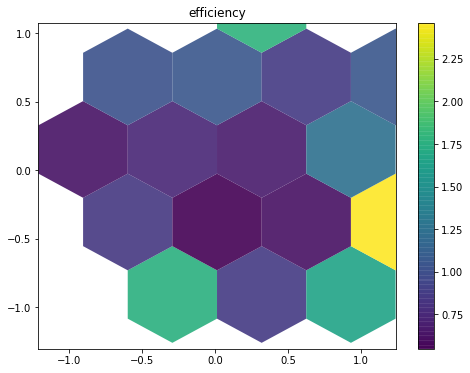

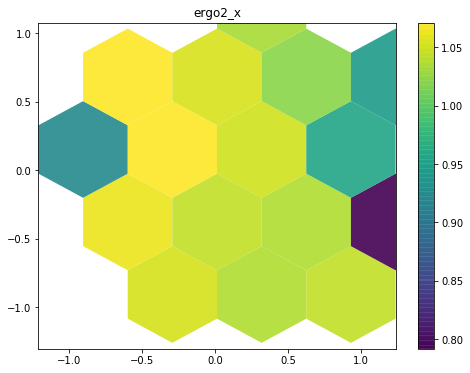

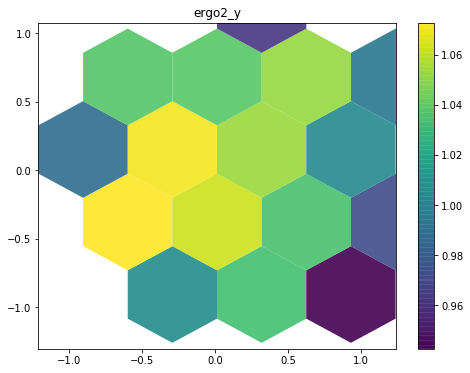

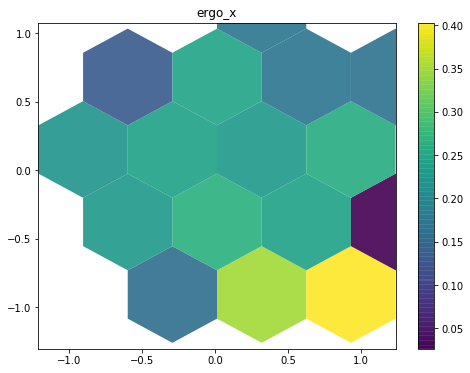

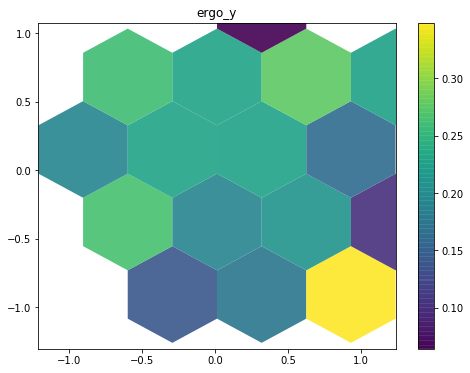

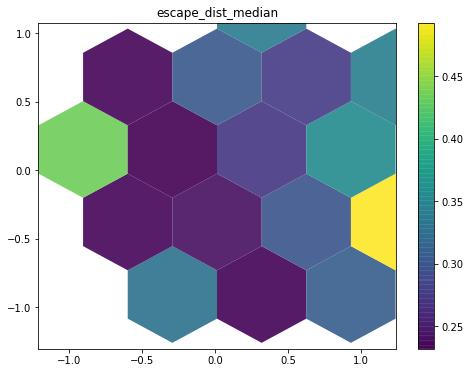

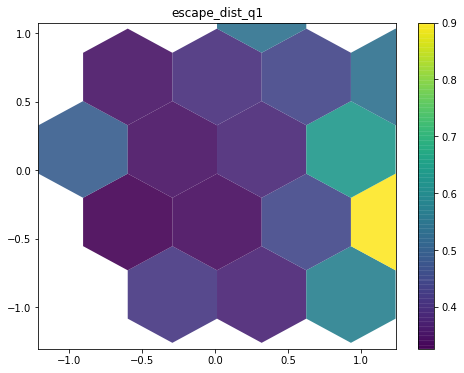

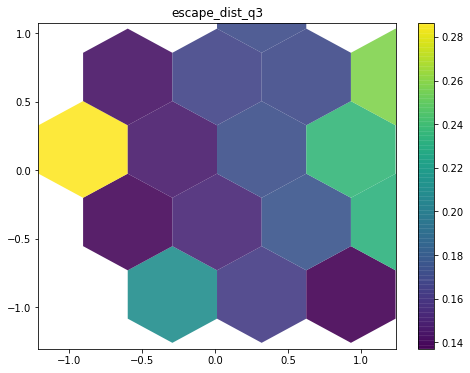

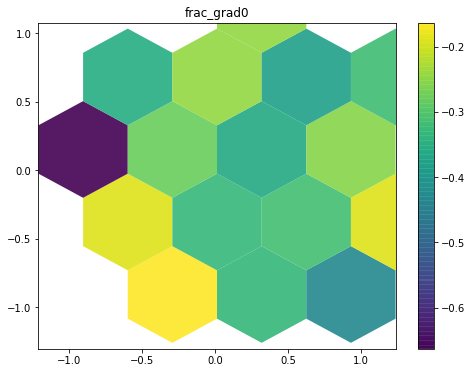

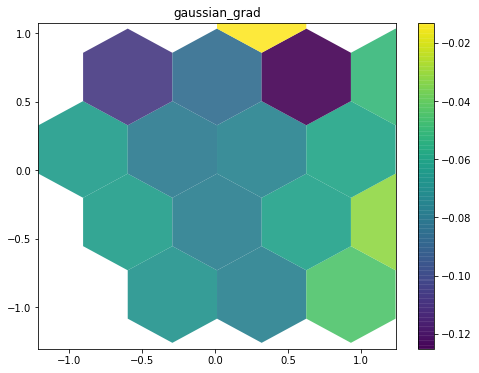

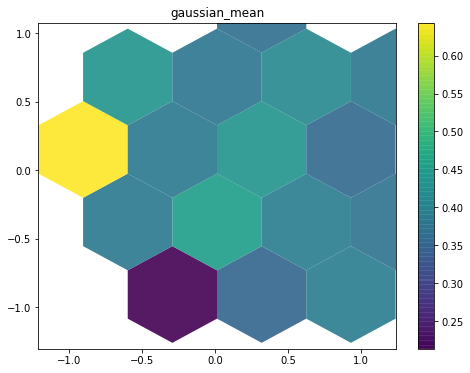

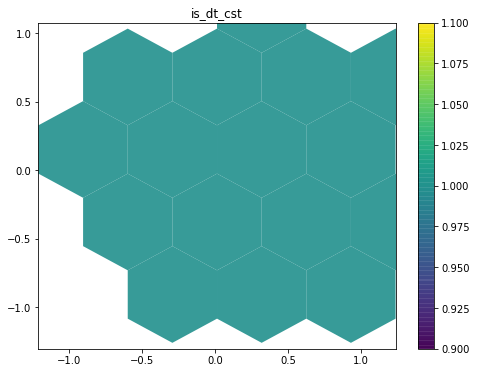

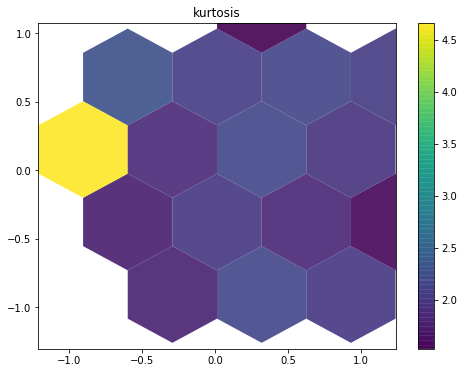

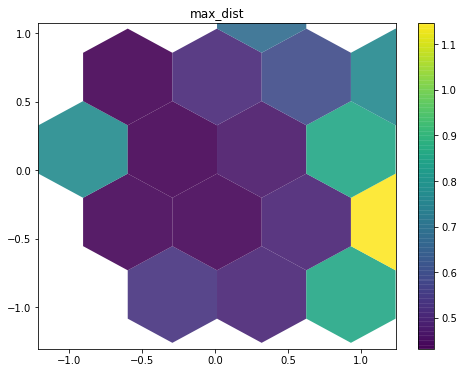

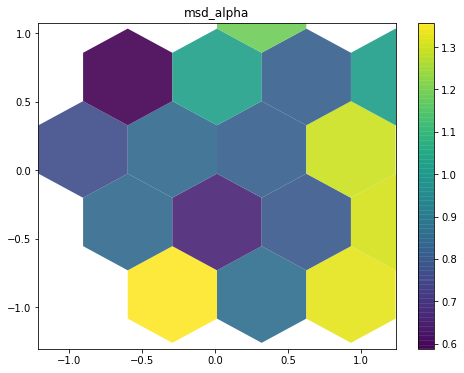

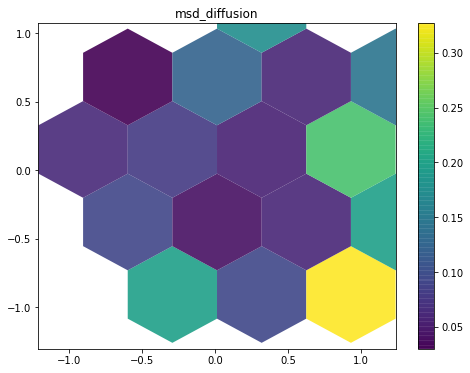

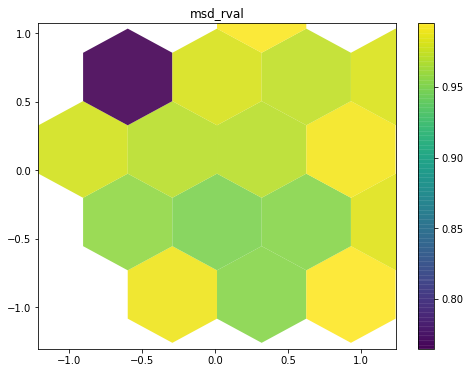

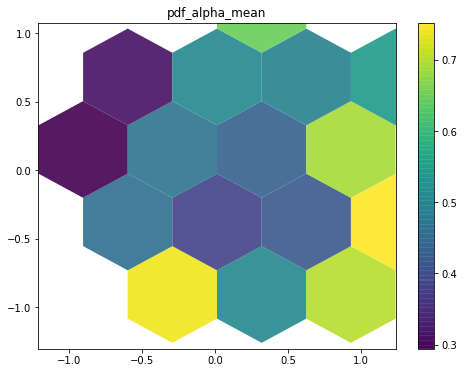

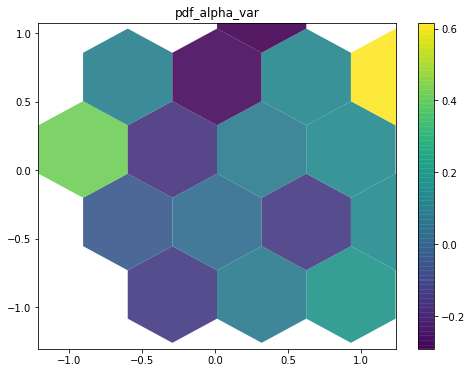

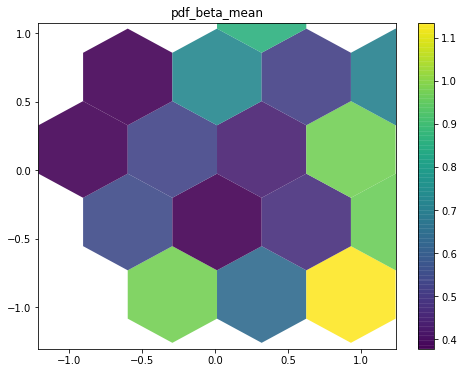

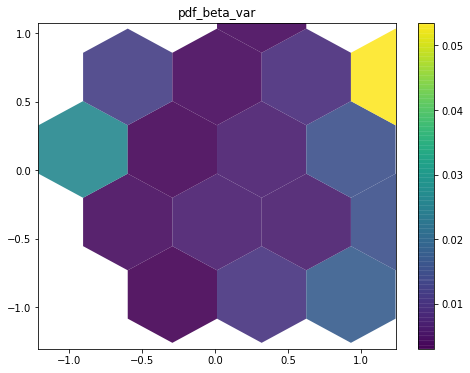

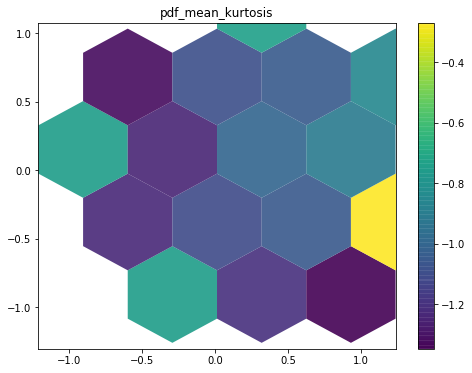

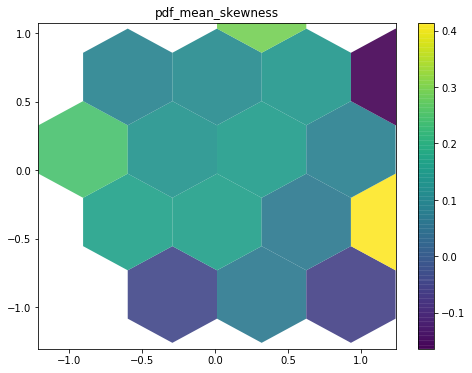

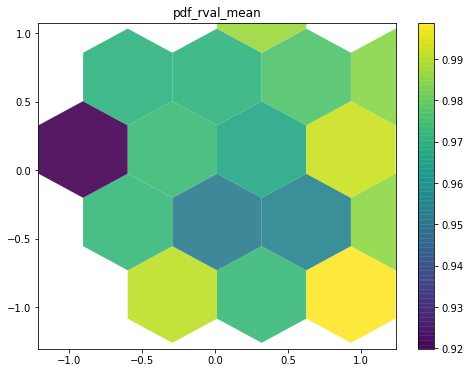

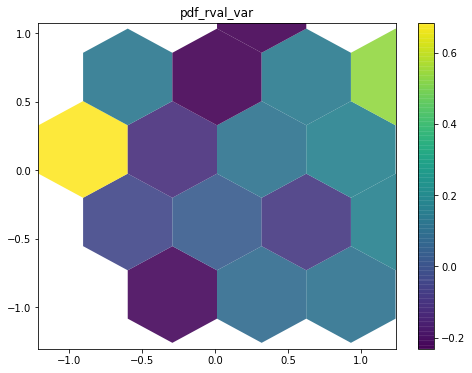

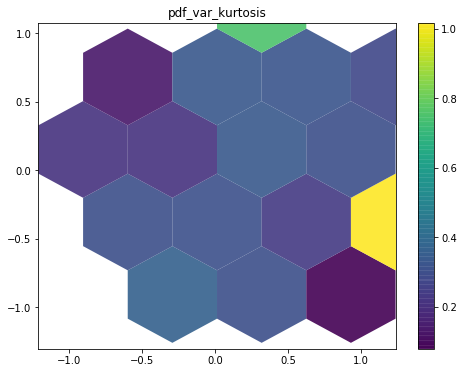

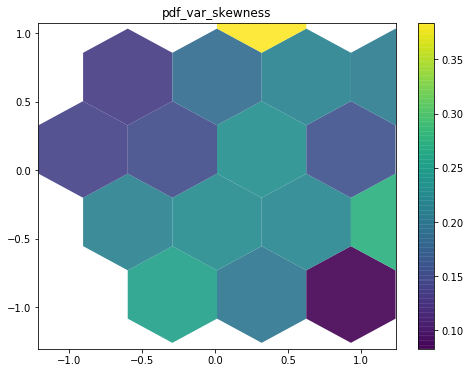

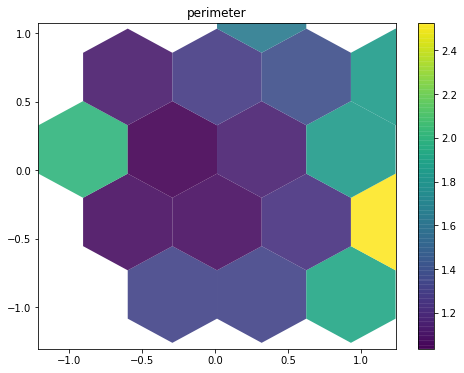

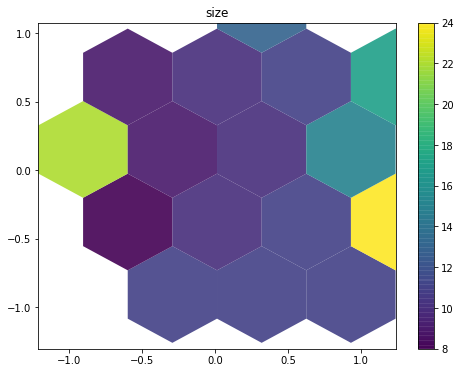

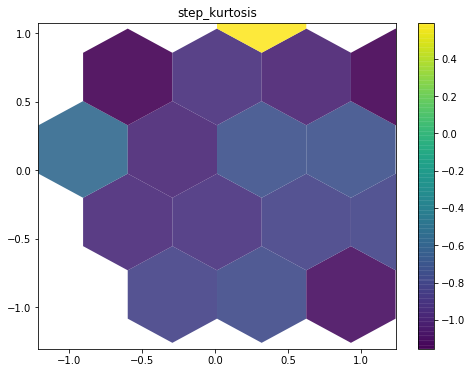

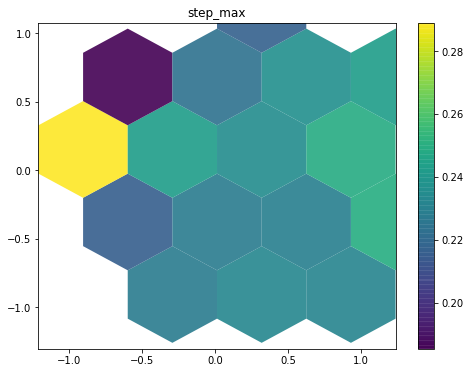

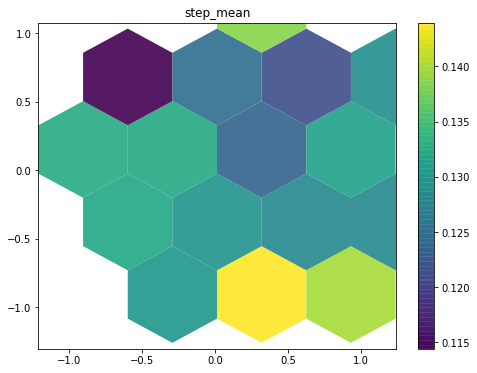

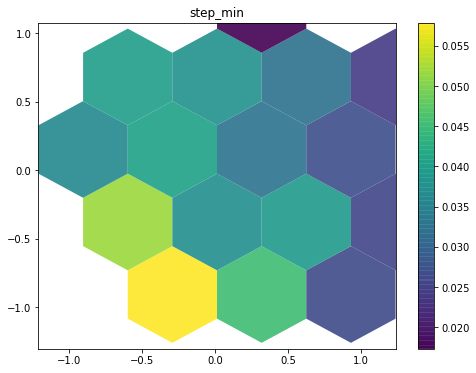

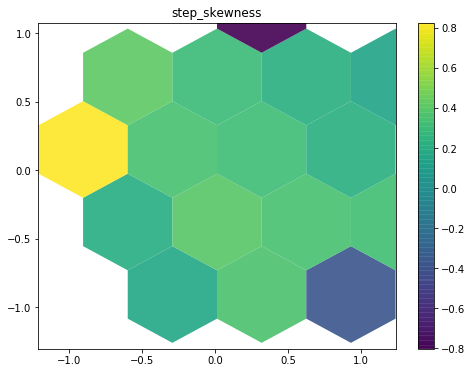

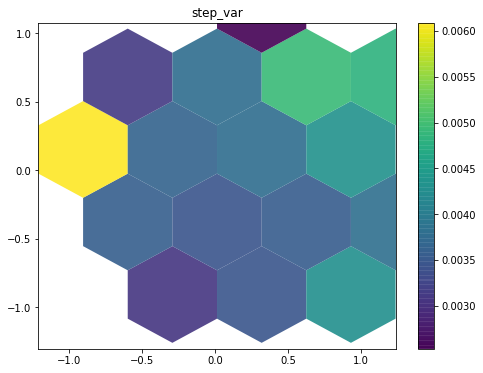

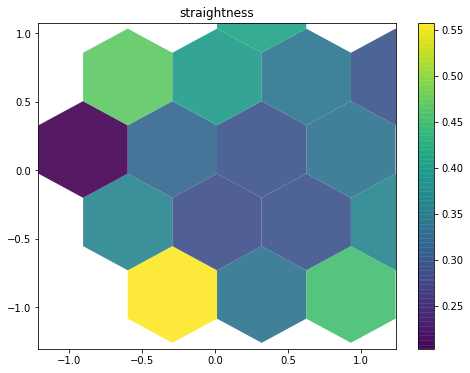

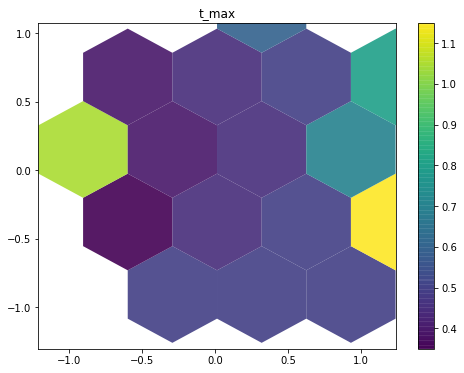

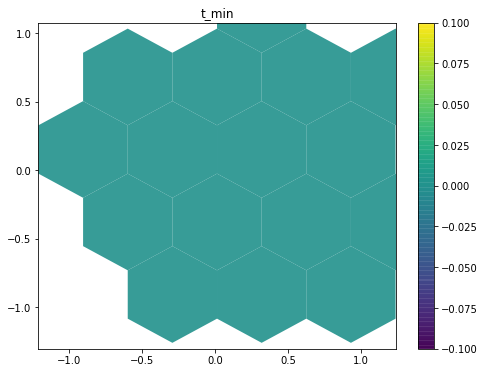

In [6]:
map_plot(helper.analyses, figsize=(8,6), mode=False)